In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.express as px

In [2]:
df = pd.read_csv('Walmart (1).csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [19]:
from prophet import Prophet

In [63]:
store_1 = df[df['Store']==1]
store_1 = store_1[['Date','Weekly_Sales']]
store_1.columns = ['ds','y']
store_1['ds'] = pd.to_datetime(store_1['ds'])
store_1 = store_1.sort_values(by='ds').reset_index()
store_1 = store_1.drop(columns=['index'])
store_1



,ds,y
0,2010-01-10,1453329.50
1,2010-02-04,1594968.28
2,2010-02-07,1492418.14
3,2010-02-19,1611968.17
4,2010-02-26,1409727.59
...,...,...
138,2012-10-08,1592409.97
139,2012-10-19,1508068.77
140,2012-10-26,1493659.74
141,2012-11-05,1611096.05


In [76]:
stores =list()
j=1
for i in range(df['Store'].nunique()):
    store_1 = df[df['Store']==j]
    store_1 = store_1[['Date','Weekly_Sales']]
    store_1.columns = ['ds','y']
    store_1['ds'] = pd.to_datetime(store_1['ds'])
    store_1 = store_1.sort_values(by='ds').reset_index()
    store_1 = store_1.drop(columns=['index'])
    stores.append(store_1)
    j=j+1

stores[10]

,ds,y
0,2010-01-10,1182490.46
1,2010-02-04,1446210.26
2,2010-02-07,1302600.14
3,2010-02-19,1503298.70
4,2010-02-26,1336404.65
...,...,...
138,2012-10-08,1388973.65
139,2012-10-19,1232073.18
140,2012-10-26,1200729.45
141,2012-11-05,1300147.07


In [79]:
predicts = list()

In [80]:
for i in range(len(stores)):
    model = Prophet(interval_width=0.95)
    model.fit(stores[0])
    future = model.make_future_dataframe(periods=12,freq='W')
    predict = model.predict(future)
    predicts.append(predict)

13:07:45 - cmdstanpy - INFO - Chain [1] start processing
13:07:45 - cmdstanpy - INFO - Chain [1] done processing
13:07:45 - cmdstanpy - INFO - Chain [1] start processing
13:07:45 - cmdstanpy - INFO - Chain [1] done processing
13:07:45 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:46 - cmdstanpy - INFO - Chain [1] done processing
13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:47 - cmdstanpy - INFO - Chain [1] done processing
13:07:47 - cmdstanpy - INFO - Chain [1] start processing
13:07:47 - cmdstanpy - INFO - Chain [1] done processing
13:07:47 - cmdstanpy - INFO - Chain [1] start processing
13:07:47 - cmdstanpy - INFO - Chain [1] done processing
13:07:47 - cmdstanpy - INFO - Chain [1] start processing
13:07:47 - cmdstanpy - INFO - Chain [1]

In [52]:
# Creating the dates for furture predicting

future = model.make_future_dataframe(periods=12,freq='W')
future[142:]

,ds
142,2012-12-10
143,2012-12-16
144,2012-12-23
145,2012-12-30
146,2013-01-06
147,2013-01-13
148,2013-01-20
149,2013-01-27
150,2013-02-03
151,2013-02-10


In [53]:

predict = model.predict(future)
predict[['ds','yhat']]

,ds,yhat
0,2010-01-10,1.436040e+06
1,2010-02-04,1.576836e+06
2,2010-02-07,1.651739e+06
3,2010-02-19,1.533404e+06
4,2010-02-26,1.486290e+06
...,...,...
150,2013-02-03,1.736412e+06
151,2013-02-10,1.813721e+06
152,2013-02-17,1.792142e+06
153,2013-02-24,1.740688e+06


In [3]:
model.plot_components(predict)

NameError: name 'model' is not defined

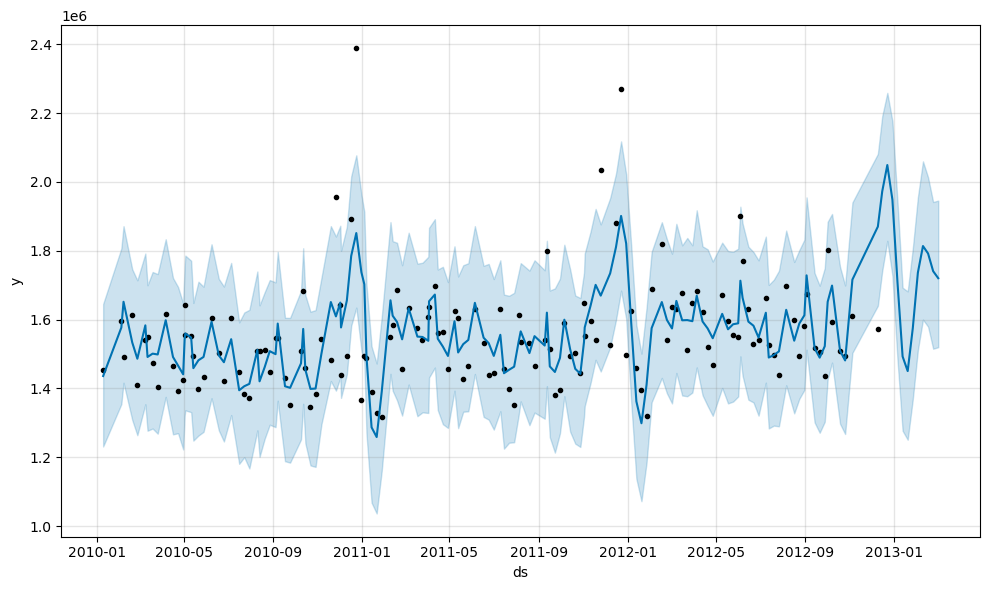

In [55]:
forecast_plot = model.plot(predict)

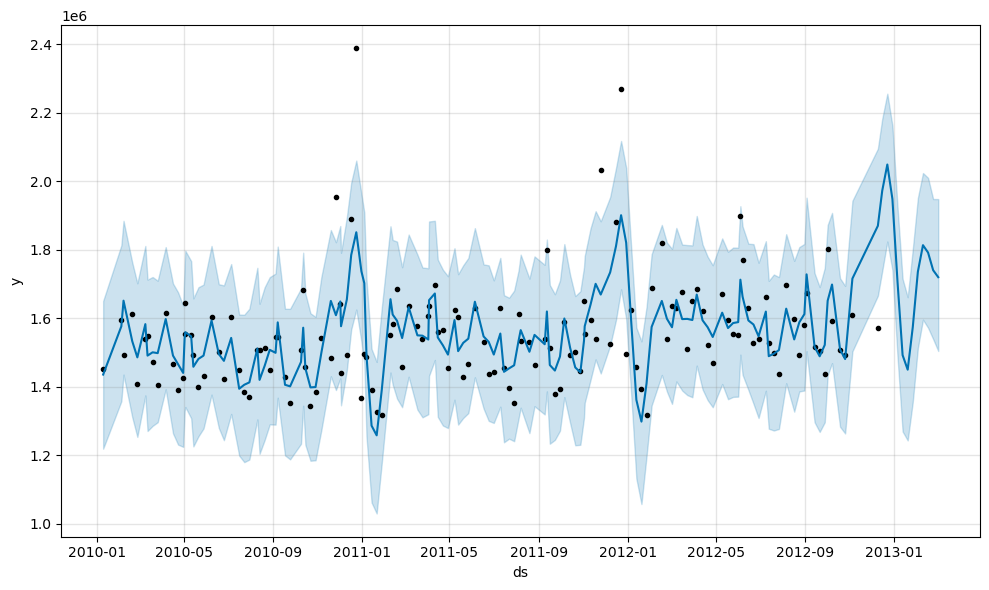

In [87]:
model.plot(predicts[0])
plt.show()